# MedVis 23 - Exercise Sheet 1 - Additional Material


---



# Preparation

Here the necessary libraries are included.

In [1]:
!pip install scipy
!pip install pydicom

import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00


# Example of how to read and display a DICOM dataset

Here is some sample code how medical image data can be read and displayed using Python. The dataset is from Jeff Mather ([DICOM Example Files ](https://de.mathworks.com/matlabcentral/fileexchange/2762-dicom-example-files), MATLAB Central File Exchange. Retrieved April 8, 2022.).

As you may know, medical imaging like CT and MRI often produce volume data by generating cross-sectional slices through the body. One way to view this data is by visualising each slice. In our DICOM data set each slice is saved as a separate file. Therefore, you first have to traverse the slice files to read and then save them in an 3D array. This is done by the function read_dcm_volume. You can then choose one slice of this volume by entering its index, e.g. `dcm_volume[:,:,8]`.

Alternatively, you can read one specific slice file right away using its file name, e.g. `dcmread("dataset1/brain_011.dcm")`.

To display a slice using a python figure, we have to convert it to an pixel array, e.g. `np.array(dcm_slice.pixel_array)`.

You can see the example code below. It might be useful for the following tasks.


Imaging Modality: MR
Slice Thickness in z-direction: 5.00000
Pixel Spacing: [0.859375, 0.859375]
Grid Size (Rows, Columns): 256 , 256
Smallest Image Pixel Value: 0
Largest Image Pixel Value: 901


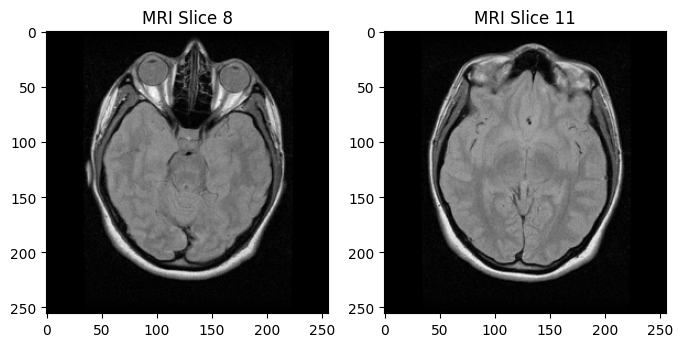

In [2]:
# Read a volume and convert to numpy array
def read_dcm_volume(name):
    volume_img = []
    for file in sorted(os.listdir(name)):
        dcm_slice = dcmread(os.path.join(name, file))
        volume_img.append(dcm_slice.pixel_array)
    return np.transpose(np.array(volume_img),(1,2,0))


# load the volume
dcm_volume = read_dcm_volume('/opt/google/drive/dicom_data') # make sure you have the correct path
# extract slice 8 in z-direction
img1 = dcm_volume[:,:,8]


# load one slice
dcm_slice = dcmread("/opt/google/drive/dicom_data/brain_011.dcm") # make sure you have the correct path
# convert it to numpy array for plotting the image
img2 = np.array(dcm_slice.pixel_array)


# Create a figure (window)
fig = plt.figure(figsize=(8,4))

# display using gray levels
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('MRI Slice 8')
ax1.imshow(img1, cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('MRI Slice 11')
ax2.imshow(img2, cmap='gray')

# Extract and print the required parameters
print("Imaging Modality:", dcm_slice.Modality)
print("Slice Thickness in z-direction:", dcm_slice.SliceThickness)
print("Pixel Spacing:", dcm_slice.PixelSpacing)
print("Grid Size (Rows, Columns):", dcm_slice.Rows, ",", dcm_slice.Columns)
print("Smallest Image Pixel Value:", dcm_slice.SmallestImagePixelValue)
print("Largest Image Pixel Value:", dcm_slice.LargestImagePixelValue)











# The problem of anisotrophy

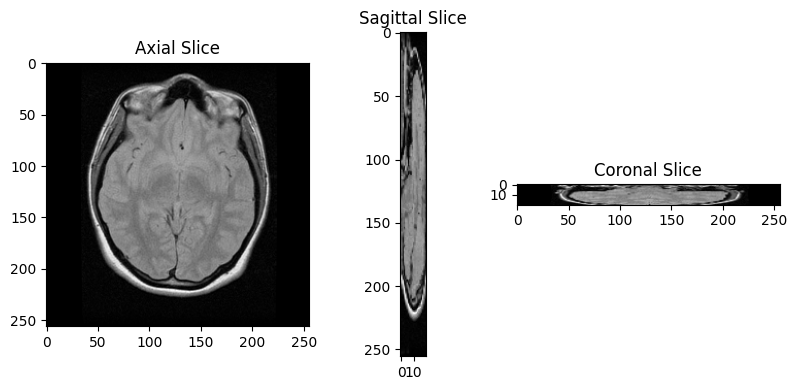

In [3]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 10  # Choose a middle slice index for axial view
sagittal_slice_index = 128  # Choose a middle slice index for sagittal view
coronal_slice_index = 128  # Choose a middle slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='gray')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()


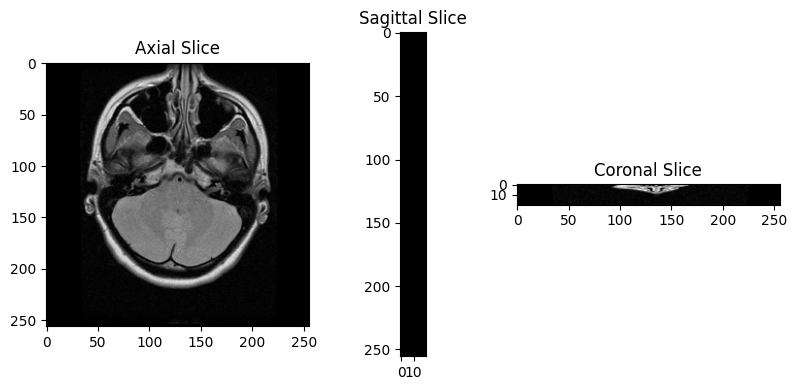

In [4]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 5  # Choose an early slice index for axial view
sagittal_slice_index = 10  # Choose an initial slice index for the sagittal view
coronal_slice_index = 10 # Choose an initial slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='gray')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()

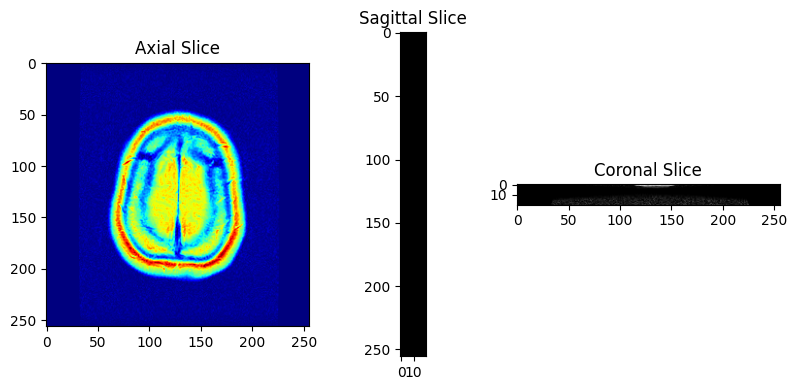

In [6]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 19  # Choose a later slice index for axial view
sagittal_slice_index = 250  # Choose a later initial slice index for the sagittal view
coronal_slice_index = 254 # Choose an later slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='jet')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()

## **TASK 3: Image Preprocessing - Smoothing**


In [ ]:
import numpy as np
from scipy import ndimage

def add_salt_pepper_noise(img):
    # Need to produce a copy as to not modify the original image
    img_copy = img.copy()
    row, col = img_copy.shape
    salt_vs_pepper = 0.5
    amount = 0.00009
    num_salt = np.ceil(amount * img_copy.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * img_copy.size * (1.0 - salt_vs_pepper))

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img_copy.shape]
    img_copy[coords] = 901

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img_copy.shape]
    img_copy[coords] = 0

    return img_copy


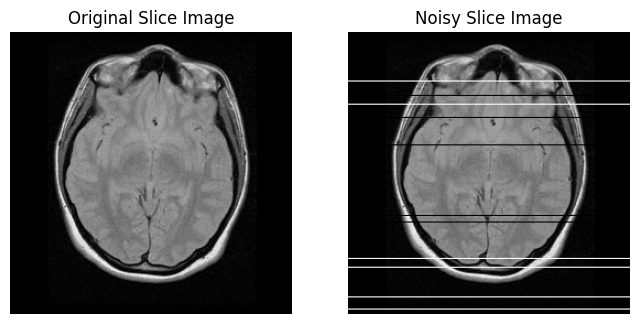

In [ ]:
noisy_slice_image = add_salt_pepper_noise(img2)
# Plot the original and noisy images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Slice Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_slice_image, cmap='gray')
plt.title('Noisy Slice Image')
plt.axis('off')

plt.show()

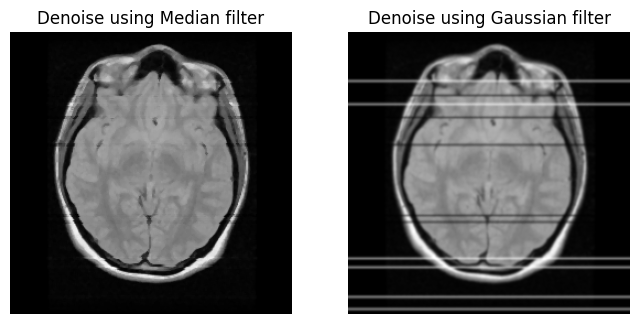

In [ ]:
# Denoise using Median filter
img_copy_median = ndimage.median_filter(noisy_slice_image, size=3)

# Denoise using Gaussian filter
img_copy_gaussian = ndimage.gaussian_filter(noisy_slice_image, sigma=1)

# Plot the original and noisy images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_copy_median, cmap='gray')
plt.title('Denoise using Median filter')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_copy_gaussian, cmap='gray')
plt.title('Denoise using Gaussian filter')
plt.axis('off')

plt.show()


In the context of medical visualization, the choice between a Median filter and a Gaussian filter depends on the specific characteristics of the noise and the desired outcome. Here's how each filter works and their suitability in different scenarios:

### Median Filter:
- **How it Works:** A Median filter replaces each pixel's value with the median value in its neighborhood. It is effective in removing salt-and-pepper noise (random, isolated pixels with extreme values).
- **Suitability:**
  - **Works Well for Salt-and-Pepper Noise:** Median filters are excellent for reducing salt-and-pepper noise, a common type of noise in medical images caused by sensor errors or transmission issues.
  - **Preserves Edges:** Median filters are good at preserving edges and fine details in the image, making them suitable for images with thin structures like vessels.
  - **Not Suited for Gaussian Noise:** Median filters are less effective for reducing Gaussian noise, which is a continuous and smooth type of noise. Applying a Median filter to Gaussian noise might result in a loss of image details.

### Gaussian Filter:
- **How it Works:** A Gaussian filter calculates the weighted average of pixel values in the neighborhood, giving more weight to closer pixels. It is effective for reducing Gaussian noise (random noise with a Gaussian distribution).
- **Suitability:**
  - **Works Well for Gaussian Noise:** Gaussian filters are suitable for reducing Gaussian noise, which is prevalent in medical images due to various factors like signal interference.
  - **Smoothens Image:** Gaussian filters smooth out the image and reduce high-frequency noise, making them suitable for images where a more uniform appearance is desired.
  - **May Blur Edges:** Gaussian filters can blur sharp edges and fine details in the image. While they reduce noise, they might not be the best choice for preserving intricate structures like blood vessels.

### Typical Artifacts and Considerations:
- **Thin Structures (Vessels):** Images with thin structures like blood vessels require filters that preserve edges and details. Median filters are often preferred in such cases as they preserve edges well.
- **Typical Artifacts:** Medical images can suffer from artifacts such as **salt-and-pepper noise**, **motion artifacts**, and **aliasing artifacts**. Median filters are effective against salt-and-pepper noise, while Gaussian filters can help in reducing motion artifacts.

In summary, **if the primary concern is reducing salt-and-pepper noise and preserving fine details (such as blood vessels), a Median filter might be a better choice. If the noise is Gaussian in nature and a smoother image is desired, a Gaussian filter might be more appropriate. Often, a combination of filtering techniques or more advanced denoising methods may be used in practice to achieve the desired results**. The choice depends on the specific characteristics of the noise and the details of the anatomical structures in the medical images.

# **TASK 4: Image Segmentation**

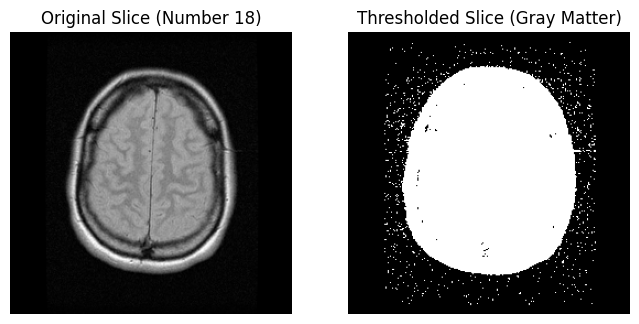

In [ ]:
# Assuming dcm_volume is loaded from the DICOM files as mentioned in the previous code snippet
# Slice number 18 (assuming 0-based index)
slice_number = 17  # Note: Python uses 0-based indexing

# Threshold value (adjust this based on the intensity characteristics of gray matter in your images)
threshold_value = 35  # Example threshold value, adjust as needed

# Perform simple thresholding on slice number 18
thresholded_slice = dcm_volume[:, :, slice_number] > threshold_value

# Plot the original and thresholded images for visualization
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(dcm_volume[:, :, slice_number], cmap='gray')
plt.title('Original Slice (Number 18)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_slice, cmap='gray')
plt.title('Thresholded Slice (Gray Matter)')
plt.axis('off')

plt.show()


In this code, threshold_value **represents the intensity threshold above which pixels are considered part of the gray matter**. You may need to adjust this threshold value based on the intensity characteristics of the gray matter in your specific images. **The thresholding operation creates a binary mask (True for gray matter, False for non-gray matter) based on the threshold condition**.

# **Follow up Question**
Then think about the
following questions from the perspective of medical visualization:
• Which filter works better? Why?
• In which cases is a median filter suited / not suited?
• In which cases is a gaussian filter suited / not suited?
Try to think about different characteristics of anatomical structures, e.g., how
about images with thin structures such as vessels? Can you think of typical
artifacts in medical imaging that might be reduced by these filters?

# **Answer**:

Thresholding is a simple and commonly used technique for image segmentation. It works by classifying pixels in an image based on their intensity values. However, in medical imaging, especially when dealing with complex structures like the brain, simple thresholding may not always yield perfect results. Here are a few reasons why thresholding might not produce an ideal segmentation:

1. **Intensity Variations:** Brain tissues can have varying intensity levels, and these variations might not be captured well by a single threshold value. Gray matter, white matter, and other structures can have **overlapping intensity ranges**, making it challenging to separate them accurately.

2. **Noise:** Medical images often contain noise due to various factors such as acquisition artifacts or sensor imperfections. Noise can cause fluctuations in pixel intensities, making it difficult to set a single threshold that effectively distinguishes between different tissues.

3. **Intensity Inhomogeneity:** Sometimes, the intensity of an object in an image can vary due to non-uniform lighting or other imaging artifacts. This intensity inhomogeneity can lead to inconsistent pixel intensities within the same tissue, making it hard to apply a global threshold.

4. **Complex Structures:** The brain contains intricate structures, and different regions might have similar intensity values. For instance, certain pathological structures or adjacent tissues can have similar intensity characteristics, making it challenging to differentiate them accurately.

5. **Partial Volume Effect:** Pixels on the boundary between different tissues (partial volume pixels) can have intensity values representing a mix of both tissues. Thresholding might misclassify these pixels as belonging to either tissue, leading to segmentation errors.

6. **Resolution Limitations:** The spatial resolution of the imaging modality might not be high enough to clearly distinguish between adjacent structures. In such cases, even a perfect segmentation algorithm would struggle to accurately delineate boundaries.

To address these challenges, more advanced segmentation techniques, such as region-based methods, edge-based methods, or machine learning approaches like deep learning, can be employed. These methods take into account spatial information, pixel connectivity, and contextual features to achieve more accurate and robust segmentations, especially in the presence of noise, intensity variations, and complex structures.

# **TASK 4: Optional (connected component analysis)**

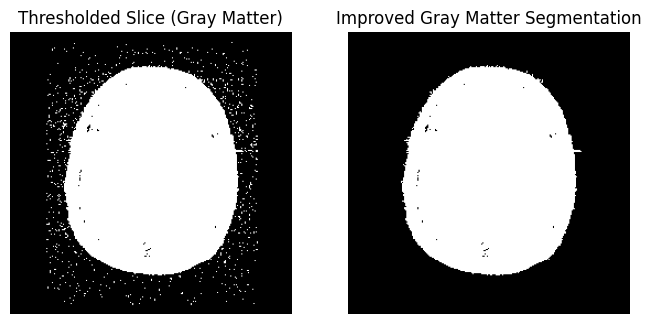

In [ ]:
from skimage.measure import label, regionprops

# Assuming thresholded_slice is your previously thresholded binary image
# Perform connected component analysis
label_im = label(thresholded_slice)  # Label connected components

# Get region properties
regions = regionprops(label_im)

# Sort the regions in ascending order of size
lst_sorted = sorted(regions, key=lambda x: x.area)

# Take the data from the last index from the list (largest connected component)
gray_matter_mask = label_im == lst_sorted[-1].label

# Plot the original and improved segmentations for visualization
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(thresholded_slice, cmap='gray')
plt.title('Thresholded Slice (Gray Matter)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title('Improved Gray Matter Segmentation')
plt.axis('off')

plt.show()


# **TASK 5: Morphological Operations**

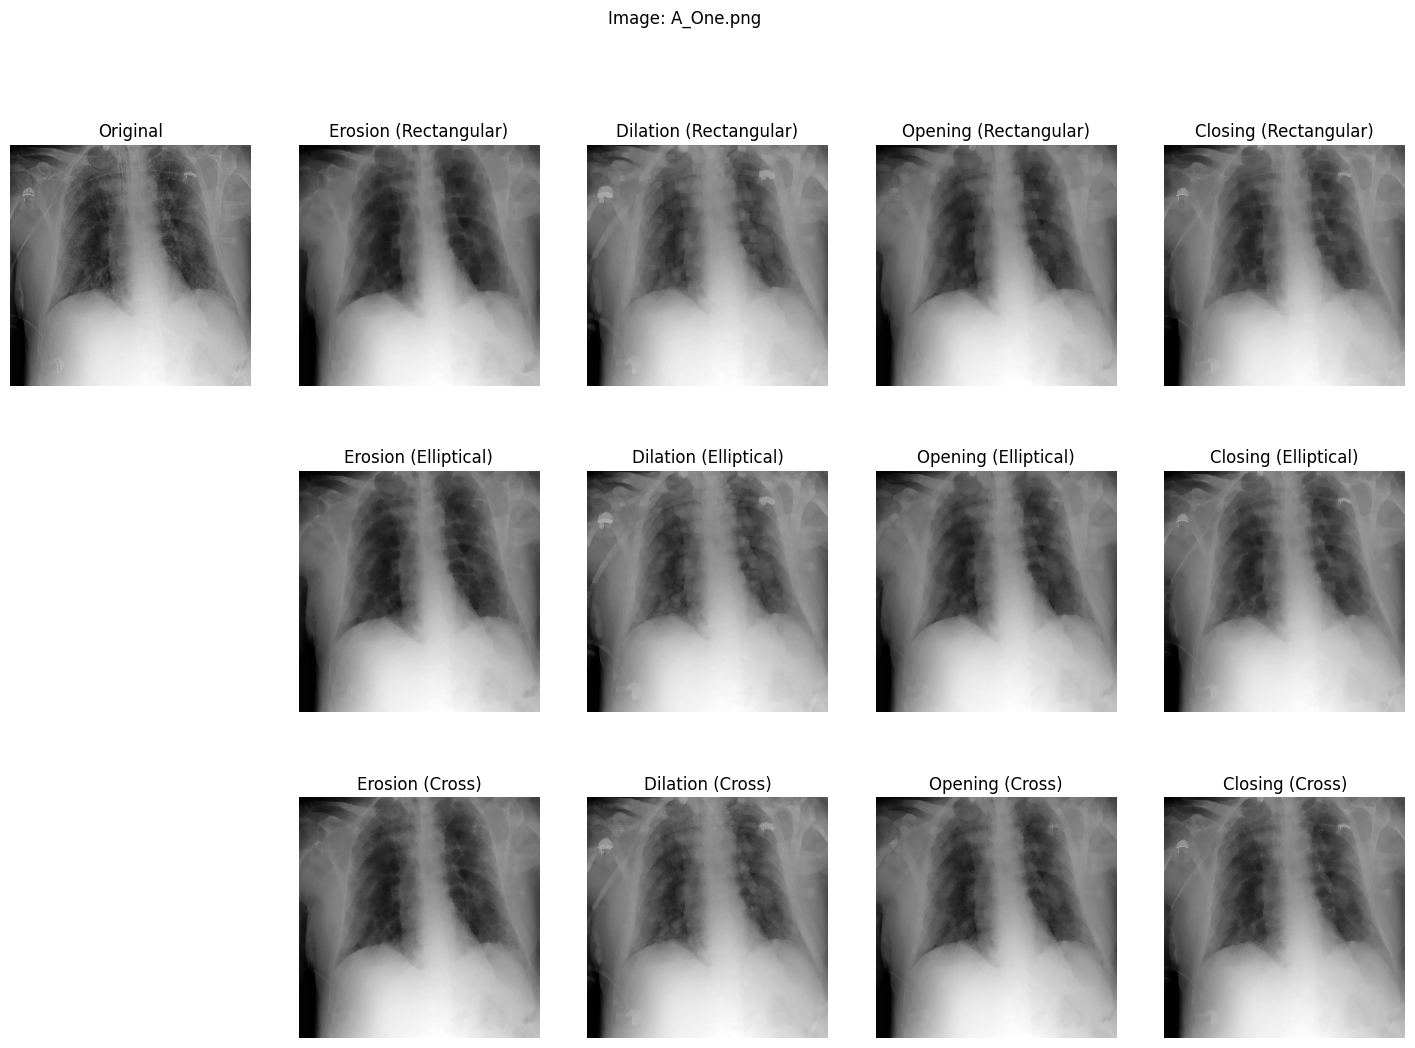

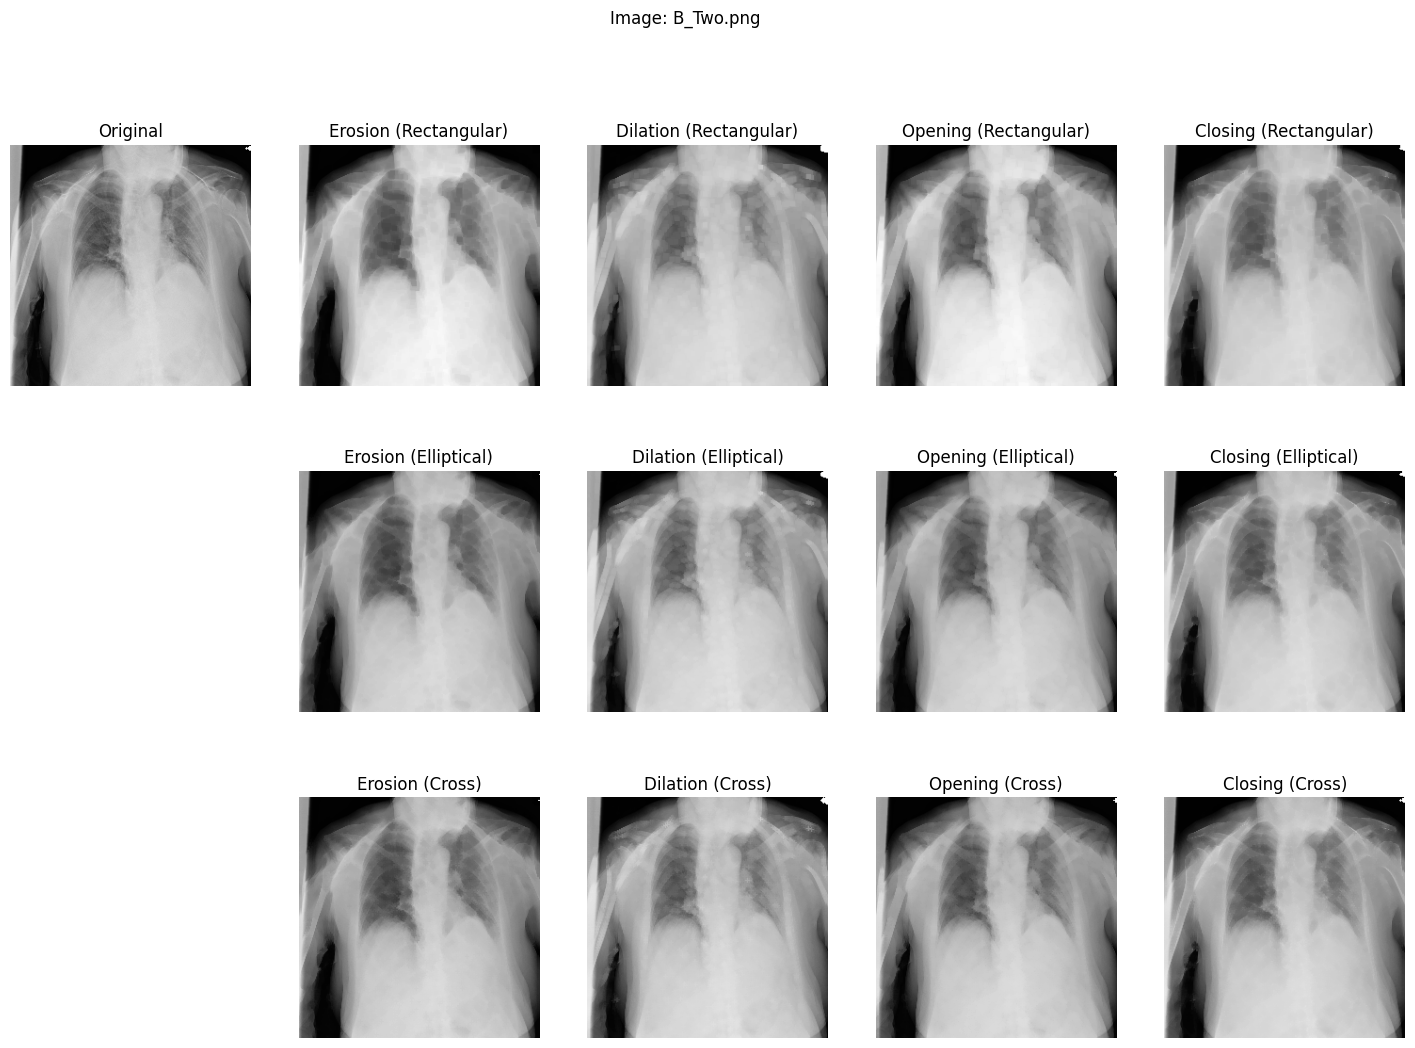

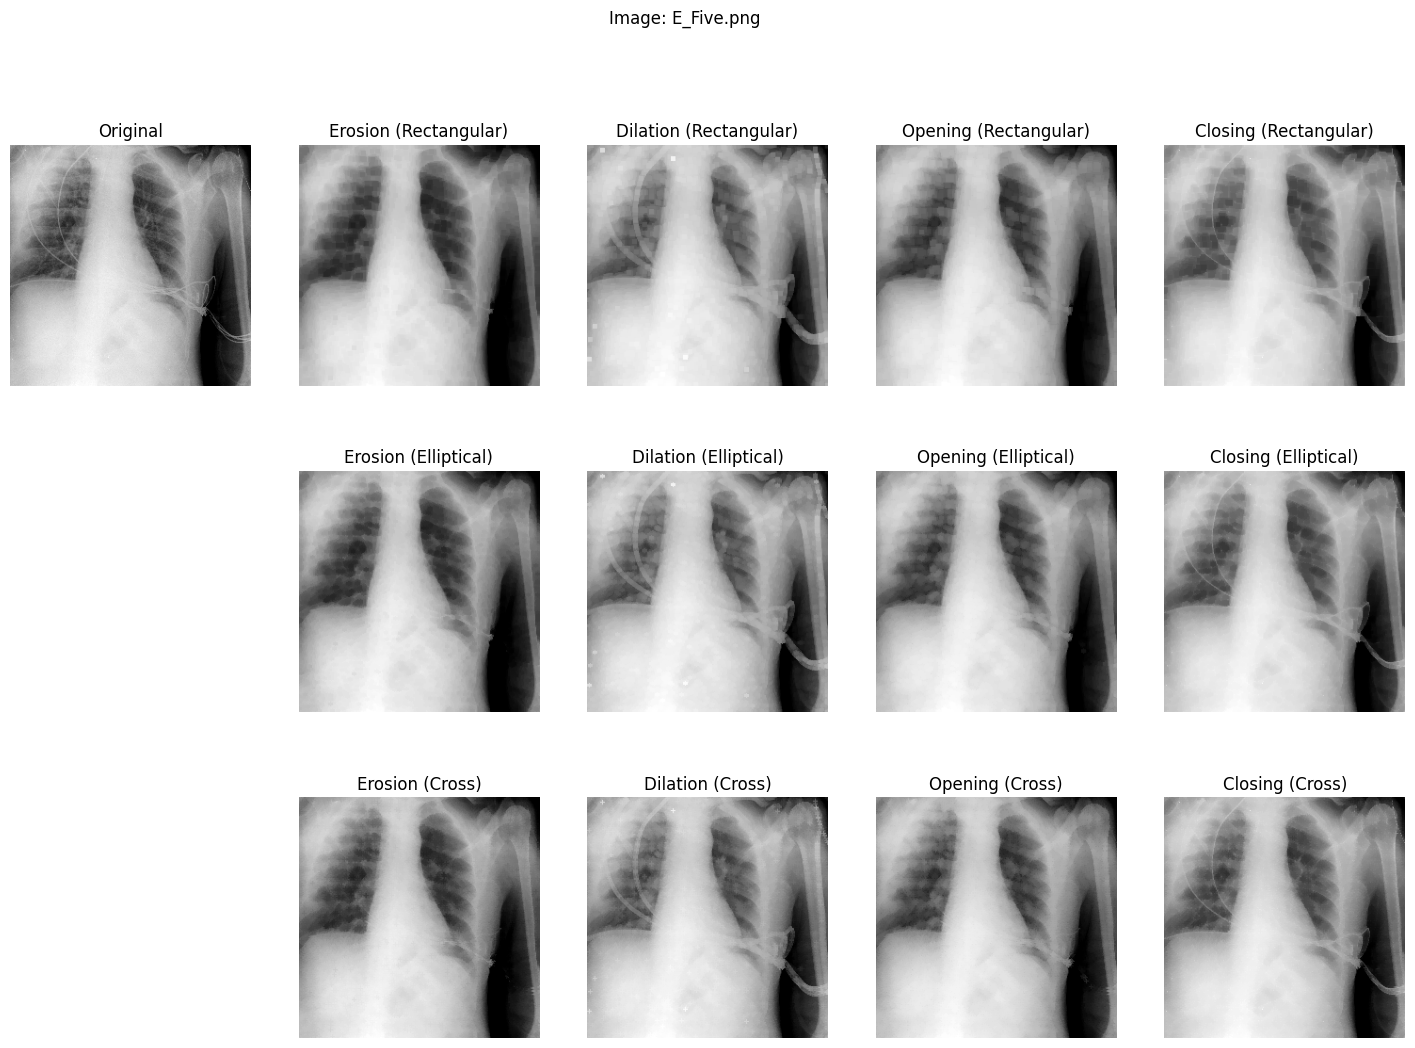

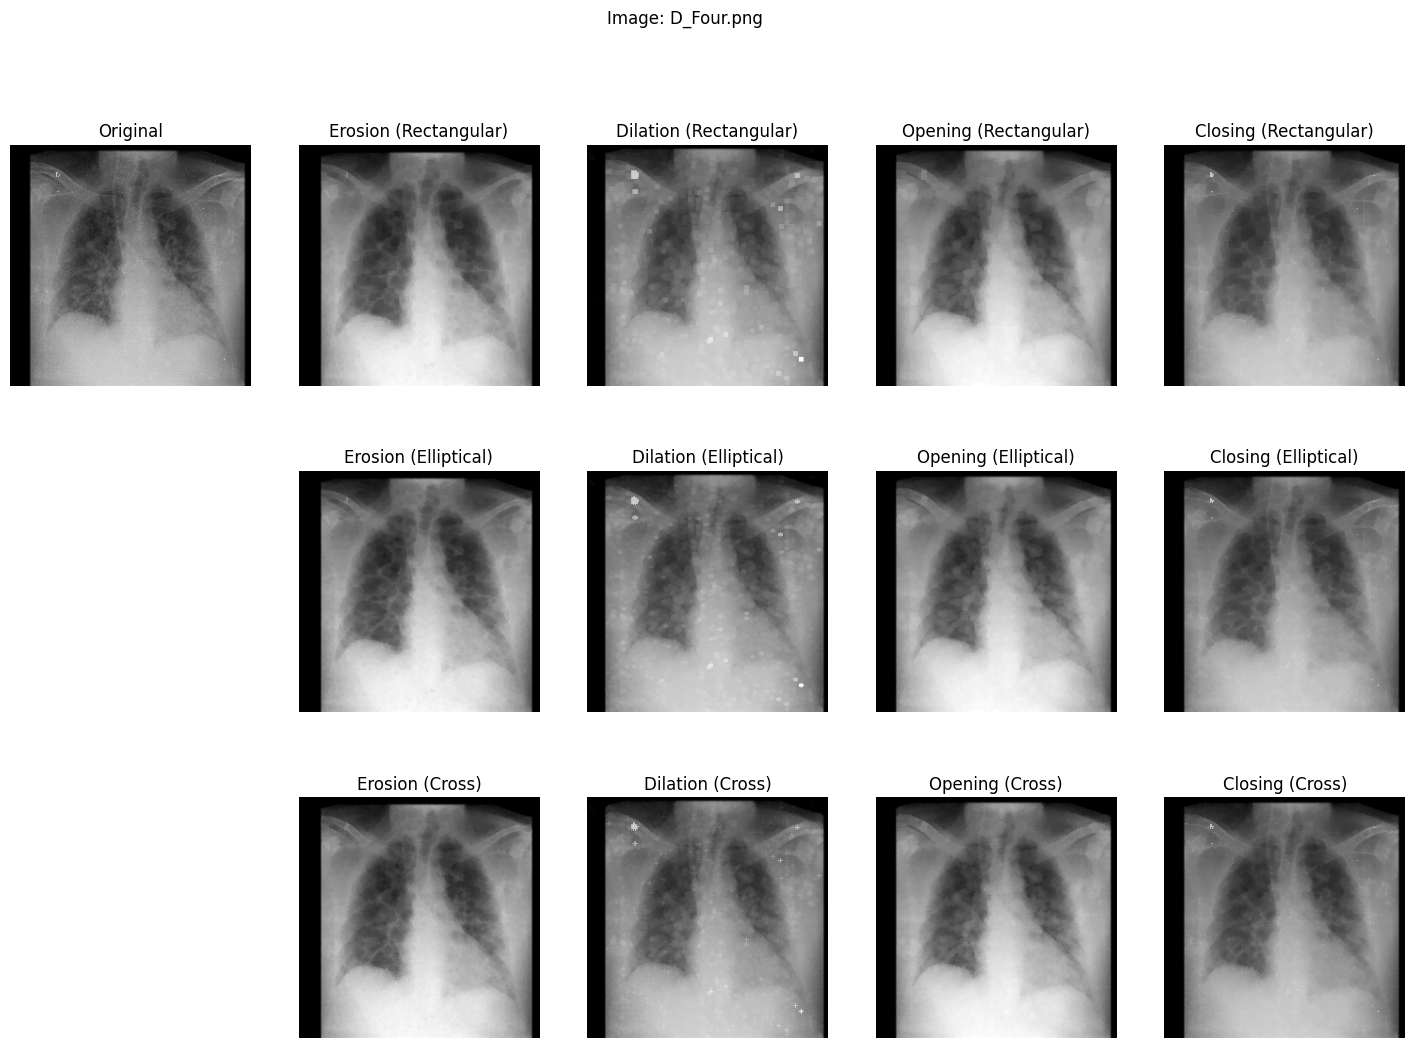

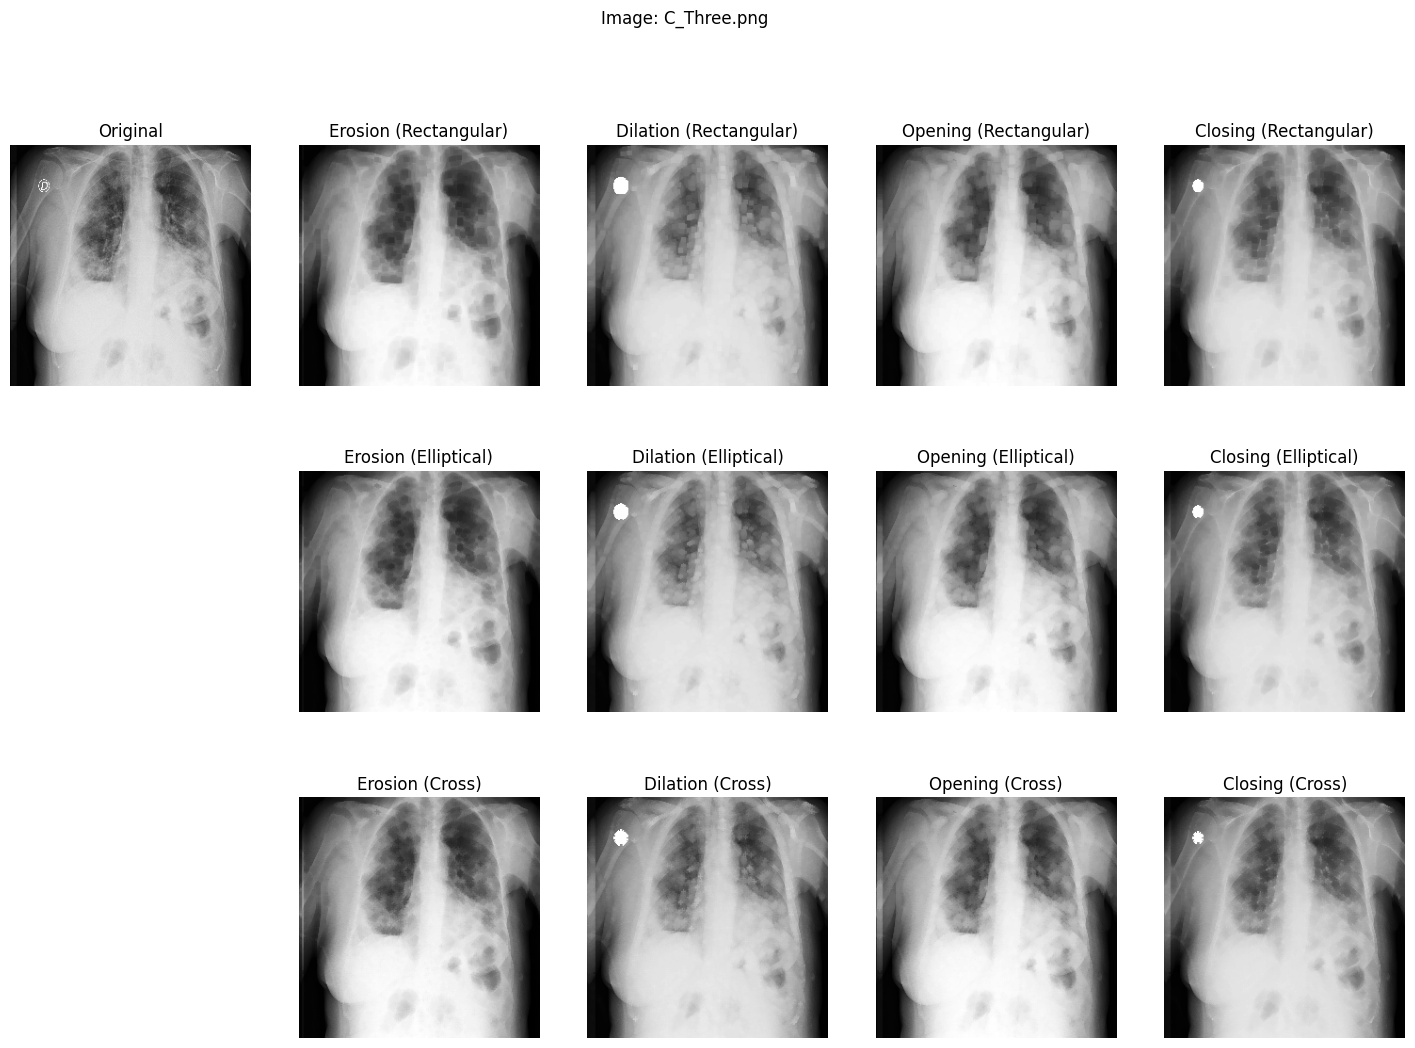

In [8]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

# Specify the folder path containing PNG images
folder_path = '/opt/google/drive/png'  # Replace 'path_to_your_folder' with the actual folder path

# Get a list of all PNG files in the folder
png_files = [file for file in os.listdir(folder_path) if file.endswith('.png')]

# Define structuring elements (kernels)
rectangular_kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
elliptical_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# Perform morphological operations on each PNG image in the folder
for png_file in png_files:
    # Load PNG image
    img = cv.imread(os.path.join(folder_path, png_file), cv.IMREAD_GRAYSCALE)

    # Apply morphological operations with rectangular kernel
    erosion_rectangular = cv.erode(img, rectangular_kernel, iterations=1)
    dilation_rectangular = cv.dilate(img, rectangular_kernel, iterations=1)
    opening_rectangular = cv.morphologyEx(img, cv.MORPH_OPEN, rectangular_kernel)
    closing_rectangular = cv.morphologyEx(img, cv.MORPH_CLOSE, rectangular_kernel)

    # Apply morphological operations with elliptical kernel
    erosion_elliptical = cv.erode(img, elliptical_kernel, iterations=1)
    dilation_elliptical = cv.dilate(img, elliptical_kernel, iterations=1)
    opening_elliptical = cv.morphologyEx(img, cv.MORPH_OPEN, elliptical_kernel)
    closing_elliptical = cv.morphologyEx(img, cv.MORPH_CLOSE, elliptical_kernel)

    # Apply morphological operations with cross-shaped kernel
    erosion_cross = cv.erode(img, cross_kernel, iterations=1)
    dilation_cross = cv.dilate(img, cross_kernel, iterations=1)
    opening_cross = cv.morphologyEx(img, cv.MORPH_OPEN, cross_kernel)
    closing_cross = cv.morphologyEx(img, cv.MORPH_CLOSE, cross_kernel)

    # Plot original and processed images for comparison
    plt.figure(figsize=(18, 12))

    plt.subplot(3, 5, 1), plt.imshow(img, cmap='gray')
    plt.title('Original'), plt.axis('off')

    plt.subplot(3, 5, 2), plt.imshow(erosion_rectangular, cmap='gray')
    plt.title('Erosion (Rectangular)'), plt.axis('off')
    plt.subplot(3, 5, 3), plt.imshow(dilation_rectangular, cmap='gray')
    plt.title('Dilation (Rectangular)'), plt.axis('off')
    plt.subplot(3, 5, 4), plt.imshow(opening_rectangular, cmap='gray')
    plt.title('Opening (Rectangular)'), plt.axis('off')
    plt.subplot(3, 5, 5), plt.imshow(closing_rectangular, cmap='gray')
    plt.title('Closing (Rectangular)'), plt.axis('off')

    plt.subplot(3, 5, 7), plt.imshow(erosion_elliptical, cmap='gray')
    plt.title('Erosion (Elliptical)'), plt.axis('off')
    plt.subplot(3, 5, 8), plt.imshow(dilation_elliptical, cmap='gray')
    plt.title('Dilation (Elliptical)'), plt.axis('off')
    plt.subplot(3, 5, 9), plt.imshow(opening_elliptical, cmap='gray')
    plt.title('Opening (Elliptical)'), plt.axis('off')
    plt.subplot(3, 5, 10), plt.imshow(closing_elliptical, cmap='gray')
    plt.title('Closing (Elliptical)'), plt.axis('off')

    plt.subplot(3, 5, 12), plt.imshow(erosion_cross, cmap='gray')
    plt.title('Erosion (Cross)'), plt.axis('off')
    plt.subplot(3, 5, 13), plt.imshow(dilation_cross, cmap='gray')
    plt.title('Dilation (Cross)'), plt.axis('off')
    plt.subplot(3, 5, 14), plt.imshow(opening_cross, cmap='gray')
    plt.title('Opening (Cross)'), plt.axis('off')
    plt.subplot(3, 5, 15), plt.imshow(closing_cross, cmap='gray')
    plt.title('Closing (Cross)'), plt.axis('off')

    plt.suptitle(f'Image: {png_file}')
    plt.show()
